In [1]:
from osa import Client

In [3]:
cl = Client("http://esb.ipp-hgw.mpg.de:8280/services/w7xfp?wsdl")

In [5]:
cl.service.getProfilesNumberOfKnots()

21

In [6]:
print(cl.service)

getFourierCoefficientslmn
	FourierCoefficients result  = getFourierCoefficientslmn(getFourierCoefficientslmn msg)
	FourierCoeffi...
getIotaProfile
	float[] result | None = getIotaProfile(getIotaProfile msg)
	float[] result | None = getIotaProfile(fl...
getFluxSurfaces
	Points3D[] result | None = getFluxSurfaces(getFluxSurfaces msg)
	Points3D[] result | None = getFluxSu...
sumFourierSeriesCos
	float[] result | None = sumFourierSeriesCos(sumFourierSeriesCos msg)
	float[] result | None = sumFour...
sumFourierSeriesSin
	float[] result | None = sumFourierSeriesSin(sumFourierSeriesSin msg)
	float[] result | None = sumFour...
toCylinderCoordinates
	Points3D result  = toCylinderCoordinates(toCylinderCoordinates msg)
	Points3D result  = toCylinderCoo...
toVMECCoordinates
	Points3D result  = toVMECCoordinates(toVMECCoordinates msg)
	Points3D result  = toVMECCoordinates(Fou...
getProfilesNumberOfKnots
	int result  = getProfilesNumberOfKnots(getProfilesNumberOfKnots msg)
	int result  = getProfiles

In [7]:
print(cl.types)

Points3D
	no documentation
Points
	no documentation
Vector
	no documentation
FourierCoefficients
	no documentation
getFluxSurfaces
	no documentation
getFluxSurfacesResponse
	no documentation
getFourierCoefficientsBmn
	no documentation
getFourierCoefficientsBmnResponse
	no documentation
getFourierCoefficientsRmn
	no documentation
getFourierCoefficientsRmnResponse
	no documentation
getFourierCoefficientsZmn
	no documentation
getFourierCoefficientsZmnResponse
	no documentation
getFourierCoefficientslmn
	no documentation
getFourierCoefficientslmnResponse
	no documentation
getIotaProfile
	no documentation
getIotaProfileResponse
	no documentation
getProfilesNumberOfKnots
	no documentation
getProfilesNumberOfKnotsResponse
	no documentation
sumFourierSeriesCos
	no documentation
sumFourierSeriesCosResponse
	no documentation
sumFourierSeriesSin
	no documentation
sumFourierSeriesSinResponse
	no documentation
toCylinderCoordinates
	no documentation
toCylinderCoordinatesResponse
	no documentation
t

In [8]:
p = cl.types.Points3D()
p.x1 = [5.5, 5.55, 5.6]
p.x2 = [0.0, 0.0, 0.0]
p.x3 = [0.0, 3.14, 6.28]

In [10]:
from osa import Client
cl = Client("http://esb.ipp-hgw.mpg.de:8280/services/w7xfp?wsdl")

# should be '21'
print(cl.service.getProfilesNumberOfKnots())

pressure = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
jtor = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
coil_currents = [10000,10000,10000,10000,10000,0,0]
plasma_radius = 0.52

rMn = cl.service.getFourierCoefficientsRmn(pressure,jtor,plasma_radius,coil_currents)
zMn = cl.service.getFourierCoefficientsZmn(pressure,jtor,plasma_radius,coil_currents)

iota = cl.service.getIotaProfile(pressure, jtor, plasma_radius, coil_currents)
print(iota)

21
[0.8545941361330334, 0.8545416060111998, 0.8545031053312483, 0.8546510166141172, 0.8551177543957913, 0.8557550948364265, 0.8567330850985132, 0.8583432060090312, 0.8609498551156842, 0.8646150271768627, 0.8691740465048207, 0.8744331405866339, 0.88035764056356, 0.88710497308129, 0.8949109464649893, 0.9039734154304622, 0.9144008219467512, 0.926250947115957, 0.9394953570735896, 0.9541631786977194, 0.9707385374408164]


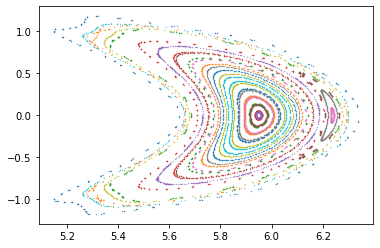

In [11]:
from osa import Client
import numpy as np
import matplotlib.pyplot as plt

tracer = Client('http://esb.ipp-hgw.mpg.de:8280/services/FieldLineProxy?wsdl')

''' set the start points (R, phi, Z) for the tracing... '''
p = tracer.types.Points3D()
p.x1 = np.linspace(5.64, 6.3, 30)
p.x2 = np.zeros(30)
p.x3 = np.zeros(30)

''' set a coil configuration ... '''
config = tracer.types.MagneticConfig()

''' e.g. using a config ID from CoilsDB: 
    1 : 'w7x standard case', 3 : 'low iota', 4 : 'high iota', 5 : 'low mirror', etc. '''
config.configIds = [1] 

''' you could also create your own coil configurations 
    e.g. use only all type 3 of the non-planar sc coils from w7x: '''
#config.coilsIds = [162, 167, 172, 177, 182, 187, 192, 197, 202, 207]
#config.coilsIdsCurrents = [9993.92, 9993.92, 9993.92, 9993.92, 9993.92, 9993.92, 9993.92, 9993.92, 9993.92, 9993.92]

''' you can use a grid for speeding up your requests. 
    Without a grid all tracing steps will be calculated by using Biot-Savart 
'''
my_grid = tracer.types.CylindricalGrid()
my_grid.RMin = 4.05
my_grid.RMax = 6.75
my_grid.ZMin = -1.35
my_grid.ZMax = 1.35
my_grid.numR = 181
my_grid.numZ = 181
my_grid.numPhi = 481

g = tracer.types.Grid()
g.cylindrical = my_grid
g.fieldSymmetry = 5

config.grid = g


pctask = tracer.types.PoincareInPhiPlane()
pctask.numPoints = 300
pctask.phi0 = [0.0]
                     
task = tracer.types.Task()
task.step = 0.01
task.poincare = pctask

''' you can use a Machine object for a limitation of the tracing region. 
    This sample uses a torus model (id = 164) from ComponentsDB: '''
machine = tracer.types.Machine()
machine.meshedModelsIds = [164] 
machine_grid = tracer.types.CartesianGrid()
machine_grid.XMin = -7
machine_grid.XMax = 7
machine_grid.YMin = -7
machine_grid.YMax = 7
machine_grid.ZMin = -1.5
machine_grid.ZMax = 1.5
machine_grid.numX = 400
machine_grid.numY = 400
machine_grid.numZ = 100

machine.grid = machine_grid
# machine = None

''' make a request to the web service: '''
result = tracer.service.trace(p, config, task, machine, None)

''' plot the results: '''
for i in range(0,len(result.surfs)):
    plt.scatter(result.surfs[i].points.x1, result.surfs[i].points.x3, s=0.1)

In [12]:
from osa import Client
import numpy as np
import matplotlib.pyplot as plt

flt = Client('http://esb:8280/services/FieldLineProxy?wsdl')

p = flt.types.Points3D()
p.x1 = np.linspace(6.0,6.3,10)
p.x2 = np.zeros(10)
p.x3 = np.zeros(10)

config = flt.types.MagneticConfig()
config.configIds = 0


In [13]:
tracer = Client('http://esb.ipp-hgw.mpg.de:8280/services/FieldLineProxy?wsdl')

pos = tracer.types.Points3D()
pos.x1 = np.linspace(5.6, 6.2, 80)
pos.x2 = np.zeros(80)
pos.x3 = np.zeros(80)

config = tracer.types.MagneticConfig()
config.configIds = [15]

lineTask = tracer.types.LineTracing()
lineTask.numSteps = 300

task = tracer.types.Task()
task.step = 0.01
task.lines = lineTask

res = tracer.service.trace(pos, config, task, None, None)

axis([-7.0, 7.0, -5.5, 5.5])

for i in range(0, len(res.lines)):
    scatter(res.lines[i].vertices.x1, res.lines[i].vertices.x3, s=0.01)

NameError: name 'axis' is not defined